In [8]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=6)

import warnings
warnings.simplefilter(action='ignore')

#https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [9]:
# Read CSV
file_name1 = 'stroke.csv'
stroke_df = pd.read_csv(file_name1)

# preview data
print(stroke_df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [10]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


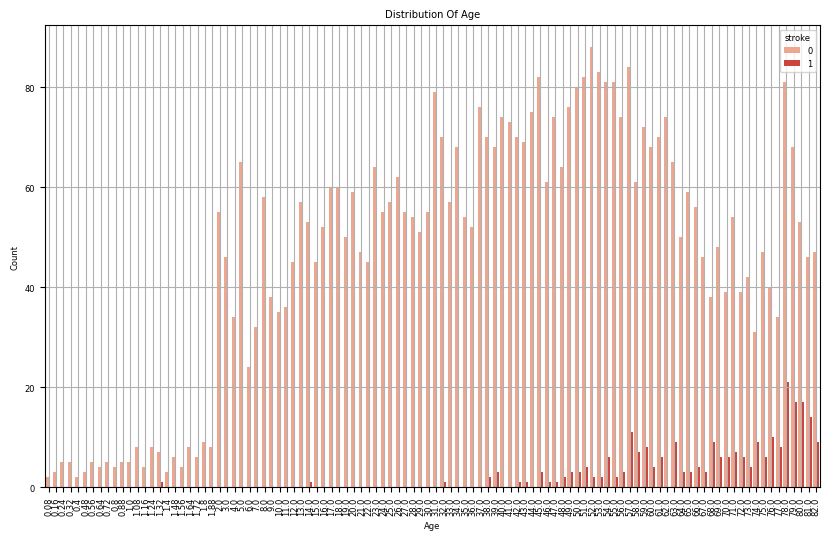

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.title("Distribution Of Age")
plt.grid(True)
plt.show()


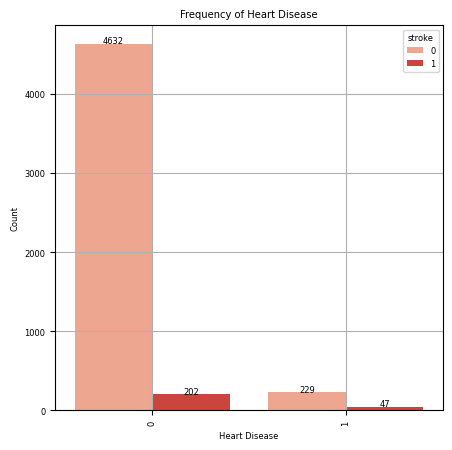

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
ax = sns.countplot(x='heart_disease', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.title("Frequency of Heart Disease")
plt.grid(True)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            int(height),
            ha="center")

plt.show()

In [13]:
#Checking for missing values
print(stroke_df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [14]:
# print the percentage of the missing "bmi" 
(stroke_df['bmi'].isnull().sum()/len(stroke_df))*100

3.9334637964774952

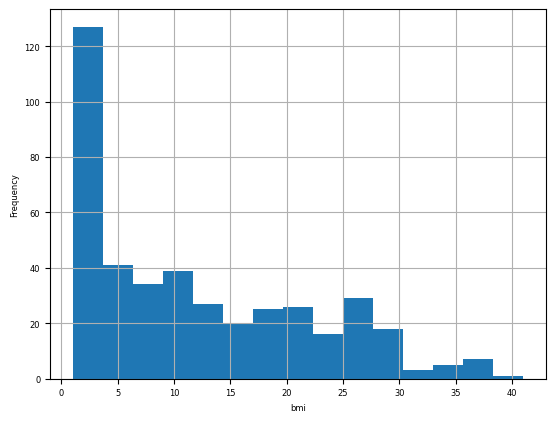

In [15]:
stroke_df['bmi'].value_counts().sort_index().plot.hist(bins = 15, rot = 0, grid = True)
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.show()

In [16]:
stroke_df['bmi'].mean()


28.893236911794673

In [17]:
stroke_df['bmi'].median()

28.1

In [18]:
(stroke_df['avg_glucose_level'].isnull().sum()/len(stroke_df))*100

0.0

In [19]:
stroke_df['avg_glucose_level'].value_counts().idxmax()

93.88

In [20]:
stroke_df2 = stroke_df.copy()
# Utilize the median bmi to fill in missing bmi
median2 = stroke_df['bmi'].median()
stroke_df2['bmi'].fillna(median2, inplace = True)

most = stroke_df['avg_glucose_level'].value_counts().idxmax()
stroke_df2['avg_glucose_level'].fillna(most, inplace = True)

In [21]:
stroke_df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
stroke_df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


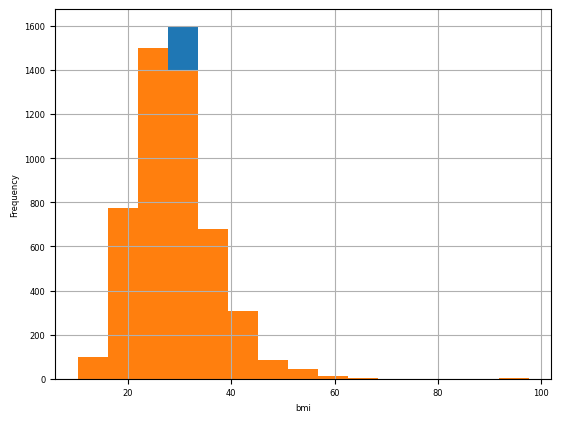

In [23]:
stroke_df2['bmi'].plot.hist(bins = 15, grid = True)
stroke_df['bmi'].plot.hist(bins = 15, grid = True)
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

feature_columns = ['age']  # List of feature columns
target_column = ['stroke']   # Target column

X = stroke_df2[feature_columns]
y = stroke_df2[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [27]:
correlation = stroke_df2['age'].corr(stroke_df['stroke'])
correlation

0.24525734617097447

In [28]:
correlation1 = stroke_df2['avg_glucose_level'].corr(stroke_df['stroke'])
correlation1

0.13194544082571005

In [29]:
correlation2 = stroke_df['bmi'].corr(stroke_df['stroke'])
correlation2

0.04237366114923359

<AxesSubplot:>

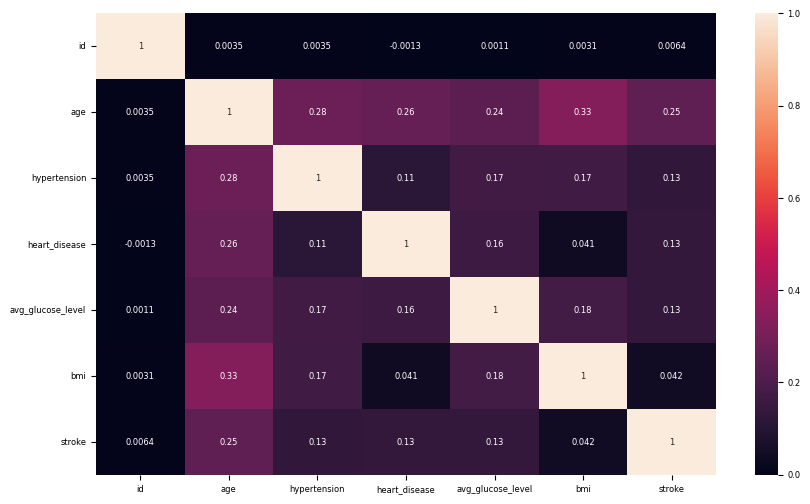

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(stroke_df.corr(),annot=True)

In [31]:
print("Correlation between variables:")
print(correlation)

Correlation between variables:
0.24525734617097447


In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())

Random Forest Cross-Validation Scores: [0.95476773 0.95354523 0.95354523 0.95471236 0.95471236]
Mean Accuracy: 0.9542565830622498


In [33]:
feature_importance_rf = rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({"Feature": feature_columns, "Importance": feature_importance_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by="Importance", ascending=False)
print("Random Forest Feature Importance:")
print(feature_importance_df_rf)

Random Forest Feature Importance:
  Feature  Importance
0     age         1.0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Drop rows with missing values
stroke_df.dropna(inplace=True)

# Separate features and target variable
X = stroke_df.drop(columns=["id", "stroke"])
y = stroke_df["stroke"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ["age", "avg_glucose_level", "bmi"]
categorical_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the classifier pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MLPClassifier(hidden_layer_sizes=(100, 100),
                                                   activation='relu',  
                                                   solver='adam',
                                                   max_iter=50,
                                                   random_state=42))])

# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.945010183299389


Epoch 1/50
123/123 - 2s - 13ms/step - accuracy: 0.9142 - loss: 0.2718 - val_accuracy: 0.9460 - val_loss: 0.2010
Epoch 2/50
123/123 - 0s - 2ms/step - accuracy: 0.9603 - loss: 0.1557 - val_accuracy: 0.9460 - val_loss: 0.1835
Epoch 3/50
123/123 - 0s - 2ms/step - accuracy: 0.9603 - loss: 0.1455 - val_accuracy: 0.9460 - val_loss: 0.1774
Epoch 4/50
123/123 - 0s - 3ms/step - accuracy: 0.9603 - loss: 0.1465 - val_accuracy: 0.9460 - val_loss: 0.1709
Epoch 5/50
123/123 - 0s - 2ms/step - accuracy: 0.9603 - loss: 0.1394 - val_accuracy: 0.9460 - val_loss: 0.1770
Epoch 6/50
123/123 - 0s - 3ms/step - accuracy: 0.9603 - loss: 0.1389 - val_accuracy: 0.9460 - val_loss: 0.1716
Epoch 7/50
123/123 - 0s - 2ms/step - accuracy: 0.9603 - loss: 0.1376 - val_accuracy: 0.9460 - val_loss: 0.1684
Epoch 8/50
123/123 - 0s - 2ms/step - accuracy: 0.9603 - loss: 0.1391 - val_accuracy: 0.9460 - val_loss: 0.1742
Epoch 9/50
123/123 - 0s - 2ms/step - accuracy: 0.9600 - loss: 0.1378 - val_accuracy: 0.9460 - val_loss: 0.1723


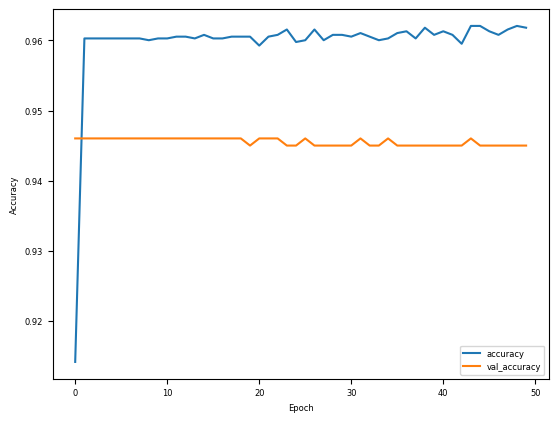

In [35]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

stroke_df.dropna(inplace=True)

label_encoders = {}
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    stroke_df[col] = label_encoders[col].fit_transform(stroke_df[col])

X = stroke_df.drop(columns=['stroke'])
y = stroke_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9460285132382892
Confusion Matrix:
 [[929   0]
 [ 53   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



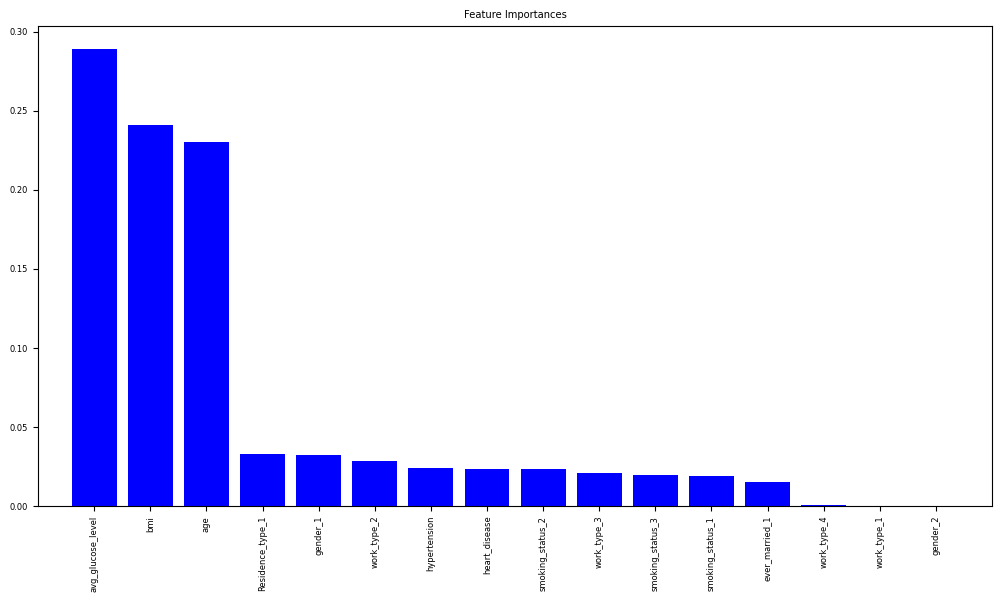

In [36]:
stroke_df = pd.get_dummies(stroke_df, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], drop_first=True)

X = stroke_df.drop(columns=["id", "stroke"])
y = stroke_df["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9550 - loss: 0.2800 - val_accuracy: 0.9460 - val_loss: 0.1857
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9571 - loss: 0.1507 - val_accuracy: 0.9460 - val_loss: 0.1771
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9653 - loss: 0.1260 - val_accuracy: 0.9460 - val_loss: 0.1705
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9617 - loss: 0.1236 - val_accuracy: 0.9460 - val_loss: 0.1713
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9574 - loss: 0.1374 - val_accuracy: 0.9460 - val_loss: 0.1763
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9646 - loss: 0.1208 - val_accuracy: 0.9460 - val_loss: 0.1708
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9601 - loss: 0.1266 - val_accuracy: 0.9460 - val_loss: 0.1744
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9544 - loss: 0.1433 - val_accuracy: 0.

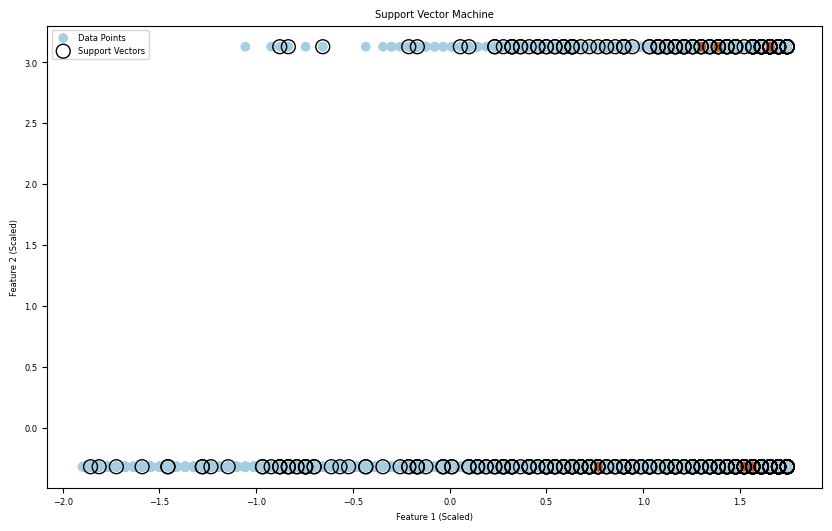

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

stroke_df.fillna(stroke_df.mean(), inplace=True)  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired, label='Data Points')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('Support Vector Machine')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9460285132382892


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


stroke_df2.drop(columns=["id", "gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"], inplace=True)

stroke_df2["bmi"].fillna(stroke_df2["bmi"].mean(), inplace=True)

# Split features and target
X = stroke_df2[['age', 'avg_glucose_level', 'bmi']]
y = stroke_df2['stroke']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(3,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8692 - loss: 0.3724
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9536 - loss: 0.1571
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9541 - loss: 0.1536
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9569 - loss: 0.1494
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9617 - loss: 0.1326
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9553 - loss: 0.1508
Epoch 7/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9569 - loss: 0.1441
Epoch 8/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9542 - loss: 0.1496
Epoch 9/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9589 - loss: 0.1373
Epoch 10/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9602 - loss: 0.1334
Epoch 11/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9528 - loss: 0.1533
Epoch 12/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Epoch 1/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9269 - loss: 0.2505 - val_accuracy: 0.9393 - val_loss: 0.2065
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9512 - loss: 0.1640 - val_accuracy: 0.9393 - val_loss: 0.1961
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9472 - loss: 0.1709 - val_accuracy: 0.9393 - val_loss: 0.1875
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9530 - loss: 0.1574 - val_accuracy: 0.9393 - val_loss: 0.1916
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9546 - loss: 0.1441 - val_accuracy: 0.9393 - val_loss: 0.1866
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9527 - loss: 0.1609 - val_accuracy: 0.9393 - val_loss: 0.1858
Epoch 7/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9530 - loss: 0.1547 - val_accuracy: 0.9393 - val_loss: 0.1875
Epoch 8/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9580 - loss: 0.1386 - val_accuracy: 0.

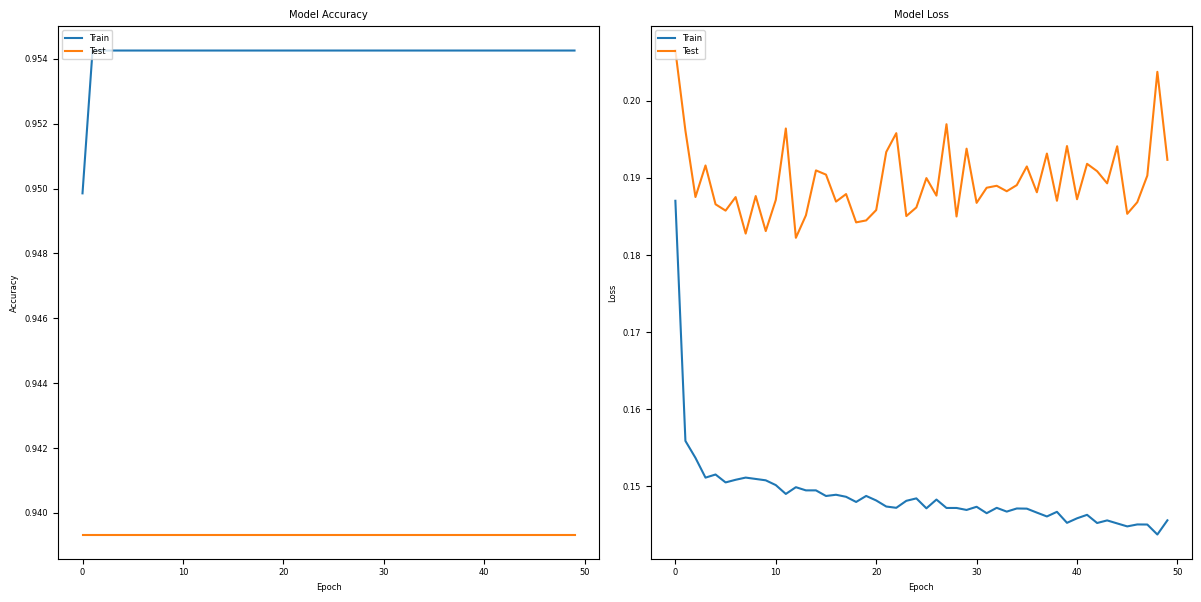

In [41]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
model = Sequential([
    Dense(100, activation='relu', input_shape=(3,)),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

Epoch 1/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9521 - loss: 0.1467 - val_accuracy: 0.9393 - val_loss: 0.1930
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9574 - loss: 0.1382 - val_accuracy: 0.9393 - val_loss: 0.1878
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9492 - loss: 0.1530 - val_accuracy: 0.9393 - val_loss: 0.1876
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9517 - loss: 0.1495 - val_accuracy: 0.9393 - val_loss: 0.1888
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9504 - loss: 0.1532 - val_accuracy: 0.9393 - val_loss: 0.1919
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9606 - loss: 0.1273 - val_accuracy: 0.9393 - val_loss: 0.1938
Epoch 7/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9538 - loss: 0.1468 - val_accuracy: 0.9393 - val_loss: 0.1890
Epoch 8/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9553 - loss: 0.1421 - val_accuracy: 0.

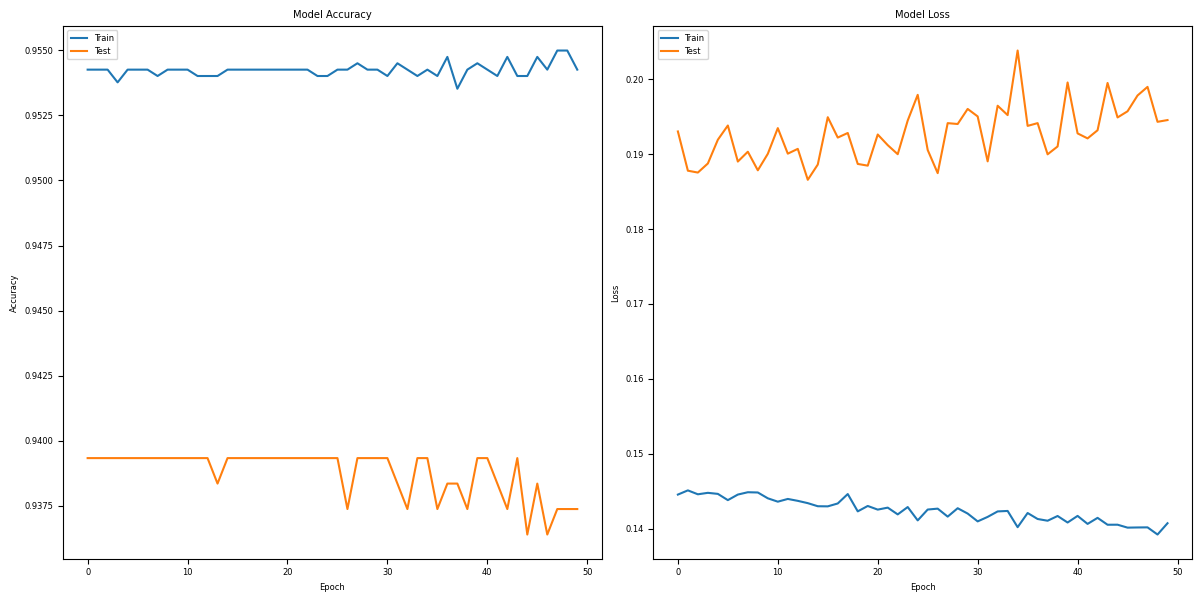

In [42]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split features and target
X = stroke_df2[['age', 'avg_glucose_level', 'bmi']]
y = stroke_df2['stroke']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


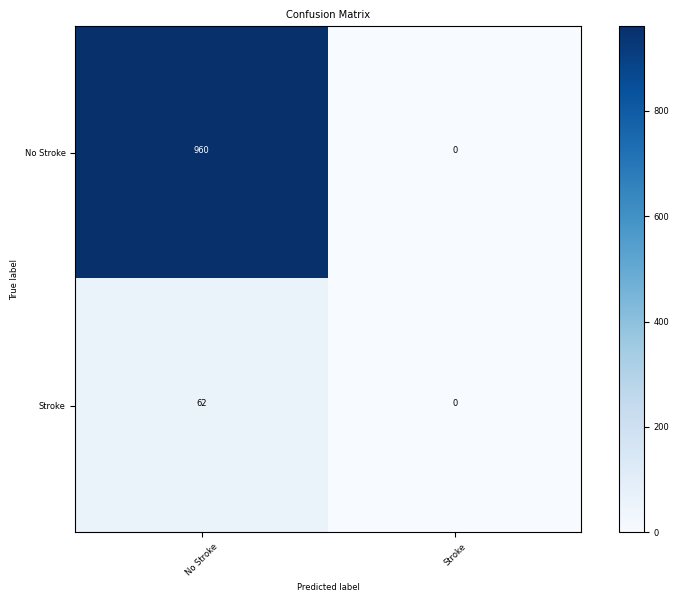

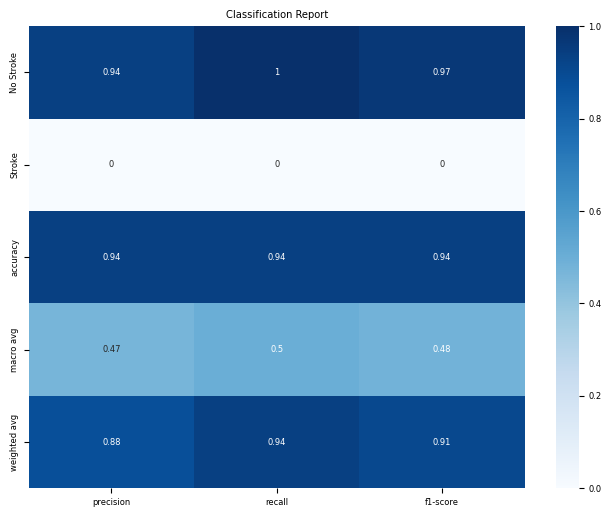

In [45]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot performance metrics
def plot_performance(y_true, y_pred, classes):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plot_confusion_matrix(cm, classes, title='Confusion Matrix')

    # Plot classification report
    plt.figure(figsize=(8, 6))
    cr = classification_report(y_true, y_pred, target_names=classes, output_dict=True)
    sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True, cmap="Blues")
    plt.title('Classification Report')

    plt.show()

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Define class labels
classes = ['No Stroke', 'Stroke']

# Plot performance
plot_performance(y_test, y_pred, classes)

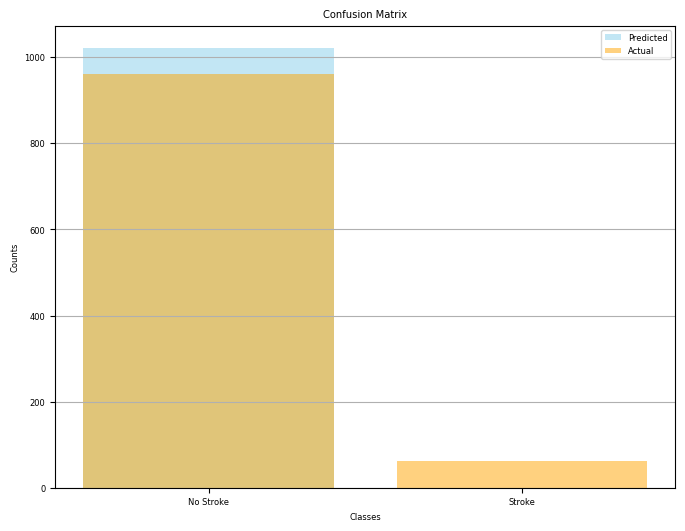

In [46]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(classes)), np.sum(cm, axis=0), color='skyblue', label='Predicted', alpha=0.5)
plt.bar(np.arange(len(classes)), np.sum(cm, axis=1), color='orange', label='Actual', alpha=0.5)
plt.xticks(np.arange(len(classes)), classes)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Confusion Matrix')
plt.legend()
plt.grid(axis='y')
plt.show()

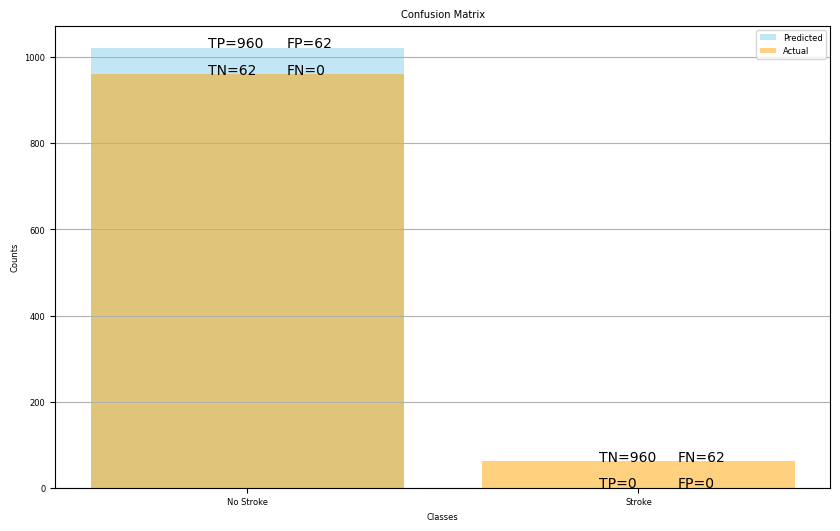

In [47]:
plt.figure(figsize=(10, 6))

# Plot bars for predicted and actual counts
plt.bar(np.arange(len(classes)), np.sum(cm, axis=0), color='skyblue', label='Predicted', alpha=0.5)
plt.bar(np.arange(len(classes)), np.sum(cm, axis=1), color='orange', label='Actual', alpha=0.5)

# Add labels for TP, FP, TN, FN
for i in range(len(classes)):
    plt.text(i-0.1, np.sum(cm, axis=0)[i] + 0.1, f'TP={cm[i][i]}', fontsize=10)
    plt.text(i-0.1, np.sum(cm, axis=1)[i] + 0.1, f'TN={np.sum(cm) - np.sum(cm, axis=1)[i]}', fontsize=10)
    plt.text(i+0.1, np.sum(cm, axis=0)[i] + 0.1, f'FP={np.sum(cm, axis=0)[i] - cm[i][i]}', fontsize=10)
    plt.text(i+0.1, np.sum(cm, axis=1)[i] + 0.1, f'FN={np.sum(cm, axis=1)[i] - cm[i][i]}', fontsize=10)

# Customize plot
plt.xticks(np.arange(len(classes)), classes)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Confusion Matrix')
plt.legend()
plt.grid(axis='y')

plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target
X = stroke_df2[['age', 'avg_glucose_level', 'bmi']]
y = stroke_df2['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 93.84%


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Feature Selection
features = ['age', 'avg_glucose_level', 'bmi']
X = stroke_df2[features]
y = stroke_df2['stroke']

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 93.84%
Confusion Matrix:
[[958   2]
 [ 61   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



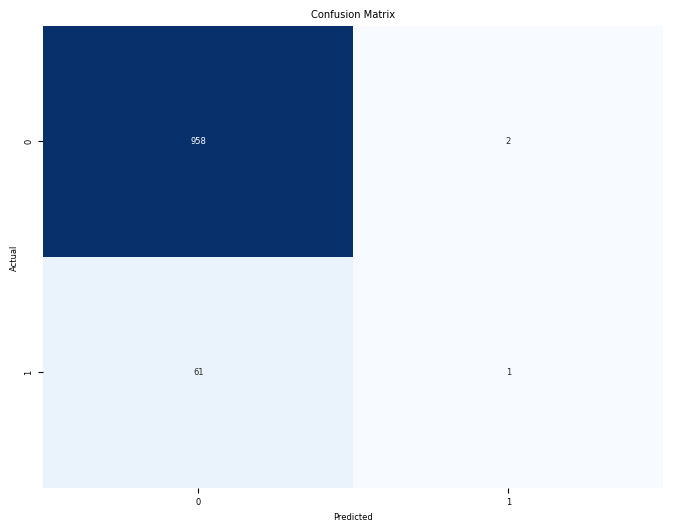

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



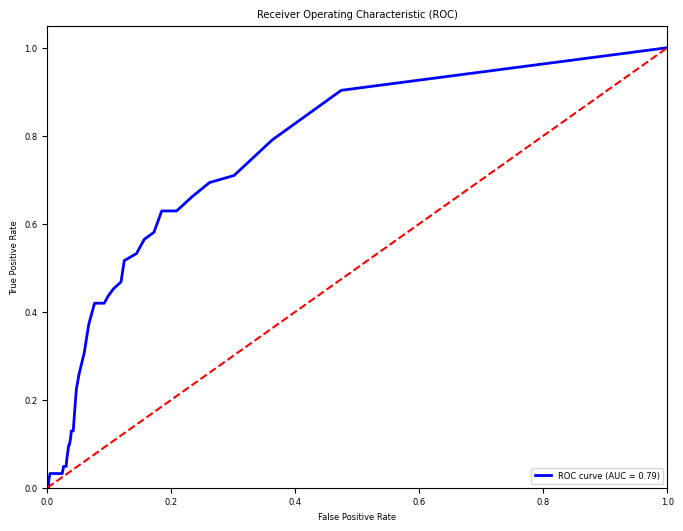

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
y_proba = rf_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

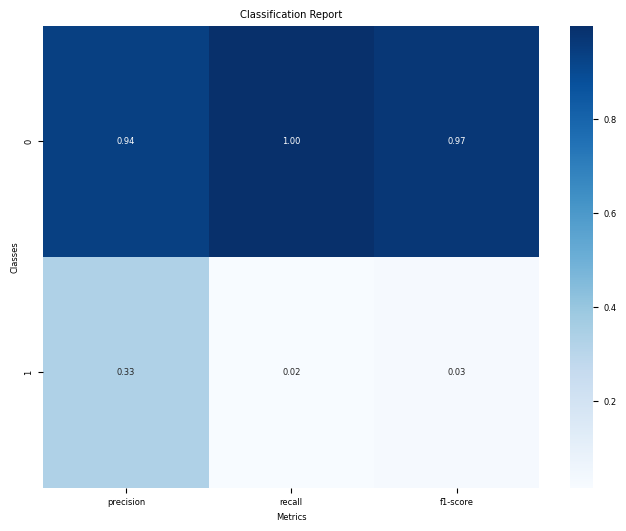

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Calculate classification report
cr = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics and labels
class_labels = list(cr.keys())[:-3]  # Extract class labels
metrics = ['precision', 'recall', 'f1-score']  # Extract metrics

# Extract values for each metric and class
values = np.array([[cr[label][metric] for metric in metrics] for label in class_labels])

# Plot classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(values, annot=True, cmap="Blues", fmt='.2f', xticklabels=metrics, yticklabels=class_labels)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()